In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#Data preparation

In [2]:
from google.colab import files
df = files.upload()

Saving supermarket_sales - Sheet1.csv to supermarket_sales - Sheet1.csv


In [3]:
df=pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.shape

(1000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

#Exploraty Data analysis

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum().sort_values(ascending=False)

Invoice ID                 0
Total                      0
gross income               0
gross margin percentage    0
cogs                       0
Payment                    0
Time                       0
Date                       0
Tax 5%                     0
Branch                     0
Quantity                   0
Unit price                 0
Product line               0
Gender                     0
Customer type              0
City                       0
Rating                     0
dtype: int64

Data outlier:
Unit price      0
Tax 5%          9
Total           9
cogs            9
gross income    9
Rating          0
Quantity        0
dtype: int64


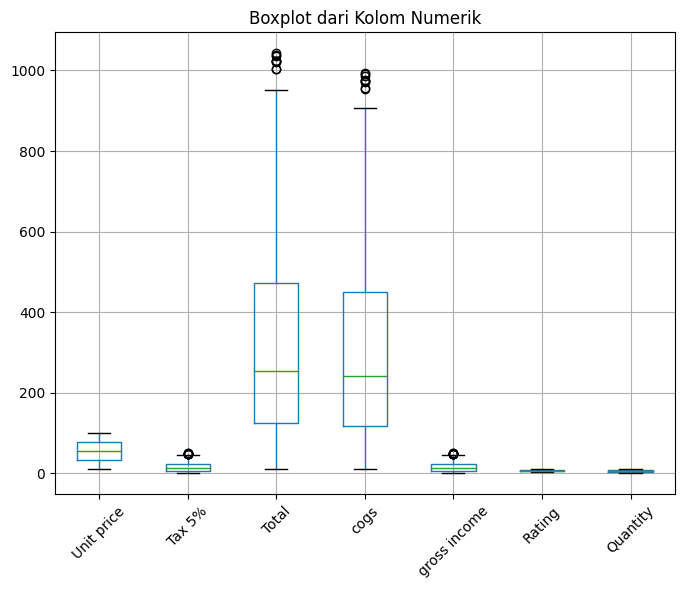

In [10]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Menghitung Q1, Q2, dan Q3 dan IQR pada kolom numerik
numeric_col = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating', 'Quantity']
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3 - Q1

# Menentukan outlier
outliers = ((df[numeric_col] < (Q1 - 1.5 * IQR)) | (df[numeric_col] > (Q3 + 1.5 * IQR))).sum()

print('Data outlier:')
print(outliers)

# Visualisasi dengan boxplot
plt.figure(figsize=(8,6))
df[numeric_col].boxplot()
plt.title('Boxplot dari Kolom Numerik')
plt.xticks(rotation=45)
plt.show()


Data tanpa outlier:
      Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
1    Electronic accessories       15.28         5   3.8200   80.2200   
2        Home and lifestyle       46.33    

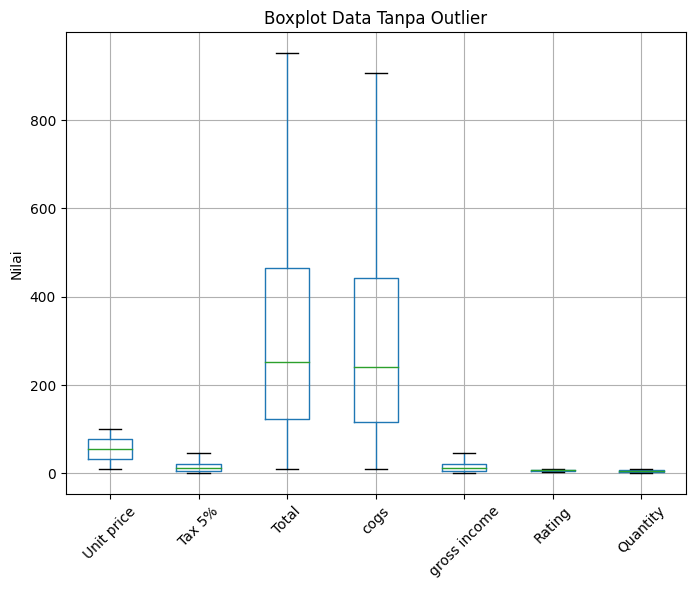

In [11]:
#menampilkan data tanpa outlier
# Menghitung Q1, Q3, dan IQR pada kolom numerik
numeric_col = ['Unit price', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating', 'Quantity']
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3 - Q1

# Menentukan outlier
outlier= (df[numeric_col] < (Q1 - 1.5 * IQR)) | (df[numeric_col] > (Q3 + 1.5 * IQR))
df_no_outlier = df[~outlier.any(axis=1)]

print('Data tanpa outlier:')
print(df_no_outlier)

# Visualisasi dengan boxplot tanpa outlier
plt.figure(figsize=(8,6))
df_no_outlier[numeric_col].boxplot()
plt.title('Boxplot Data Tanpa Outlier')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.show()

#Data inshigt

##Total penjualan per cabang

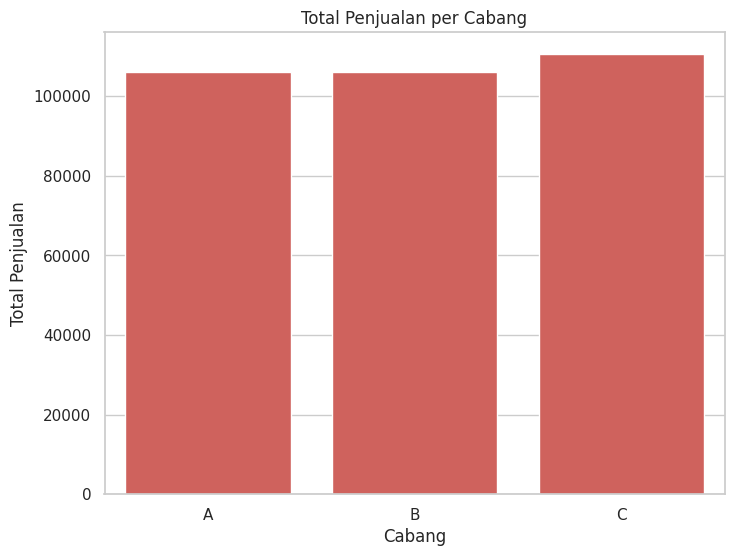

In [ ]:
import seaborn as sns

branch_sales =df.groupby('Branch')['Total'].sum() #df.groupby('Branch'): Mengelompokkan data berdasarkan kolom Branch.['Total']: Memilih kolom Total dari grup yang telah dibentuk.sum(): Menghitung total nilai dari kolom Total untuk setiap grup.Hasilnya adalah Series dengan indeks Branch dan nilai total penjualan untuk setiap Branch.
city_sales = df.groupby('City')['Total'].sum()

sns.set_theme(style="whitegrid")
sns.set_palette('Spectral')

# Visualisasi Penjualan Berdasarkan Cabang dan Kota
plt.figure(figsize=(8, 6))
sns.barplot(x=branch_sales.index, y=branch_sales.values)   #x=branch_sales.index: Sumbu x dari plot akan menggunakan indeks dari branch_sales, yang berisi nama-nama cabang.y=branch_sales.values: Sumbu y dari plot akan menggunakan nilai-nilai dari branch_sales, yang berisi total penjualan untuk setiap cabang.
#Sumbu x akan menggunakan nama-nama cabang misal(['A', 'B', 'C']).y=branch_sales.values: Sumbu y akan menggunakan nilai total penjualan untuk masing-masing cabang misal([5000, 7000, 3000]).pada indeks ada sifat yang unik dan tidak unik,jika unik biasanya melakukan pengelompokan dengan mengguanakan groupby
plt.title('Total Penjualan per Cabang')
plt.xlabel('Cabang')
plt.ylabel('Total Penjualan')
plt.show()

##Total penjualaan per kota

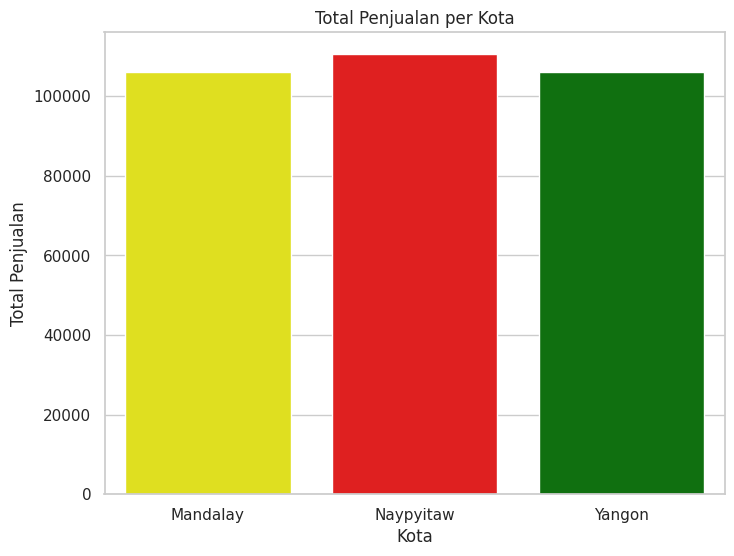

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung total penjualan per kota
city_sales = df.groupby('City')['Total'].sum().reset_index() #reset_index  Mengatur ulang indeks dari hasil pengelompokan sehingga hasilnya adalah DataFrame yang baru dengan kolom City dan Total.misalnya akan menjadi
#City  Total
#0   Yangon    350
#1  Mandalay    100
#2  Naypyitaw   130

# Mendefinisikan palet warna untuk setiap kota
palette = {
    'Yangon': 'green',
    'Mandalay': 'yellow',
    'Naypyitaw': 'red'
}

# Membuat plot dengan warna yang berbeda untuk setiap kota
plt.figure(figsize=(8, 6))
sns.barplot(x='City', y='Total', data=city_sales, palette=palette) # Membuat bar plot dengan City sebagai sumbu x, Total sebagai sumbu y, menggunakan data dari city_sales, dan menggunakan palette untuk menentukan warna batang berdasarkan kota.
plt.title('Total Penjualan per Kota')
plt.xlabel('Kota')
plt.ylabel('Total Penjualan')
plt.show()


#Rata rata penjualan per jenis pelanggan

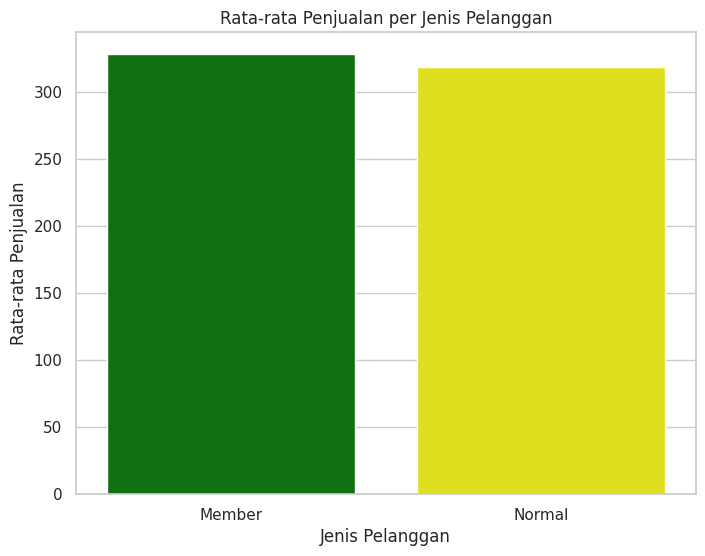

In [ ]:
palette = {
    'Member': 'green',
    'Normal': 'yellow'
}

# Analisis Berdasarkan Jenis Pelanggan dan Gender
customer_type_sales = df.groupby('Customer type')['Total'].mean()
gender_sales = df.groupby('Gender')['Total'].mean()

# Visualisasi Penjualan Berdasarkan Jenis Pelanggan
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_type_sales.index, y=customer_type_sales.values,palette=palette)
plt.title('Rata-rata Penjualan per Jenis Pelanggan')
plt.xlabel('Jenis Pelanggan')
plt.ylabel('Rata-rata Penjualan')
plt.show()

#Rata rata penjualan per gender

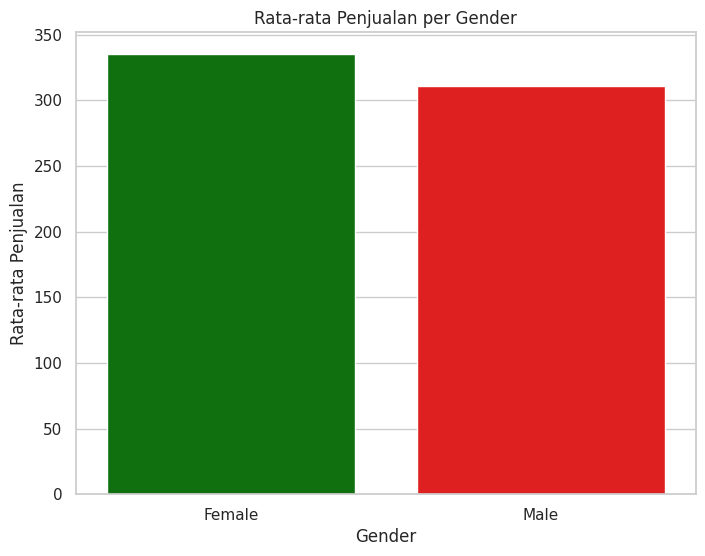

In [ ]:
palette = {
    'Female': 'green',
    'Male': 'red'
}

# Visualisasi Penjualan Berdasarkan gender
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_sales.index, y=gender_sales.values,palette=palette)
plt.title('Rata-rata Penjualan per Gender')
plt.xlabel('Gender')
plt.ylabel('Rata-rata Penjualan')
plt.show()

#Analisis prouk terlaris

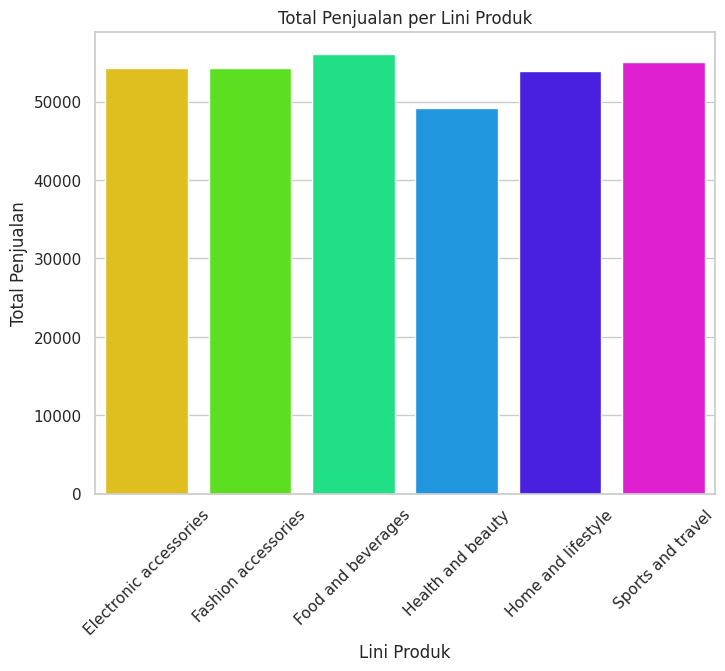

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Menghitung total penjualan per lini produk
product_sales = df.groupby('Product line')['Total'].sum()

# Membuat daftar warna
colors = sns.color_palette("hsv", len(product_sales)) #len(product_sales): Menentukan jumlah warna yang dibutuhkan berdasarkan jumlah lini produk dalam product_sales.

# Visualisasi Produk Terlaris dengan warna berbeda untuk masing-masing produk
plt.figure(figsize=(8, 6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette=colors)
plt.title('Total Penjualan per Lini Produk')
plt.xlabel('Lini Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()


#Analisis metode pembayaran

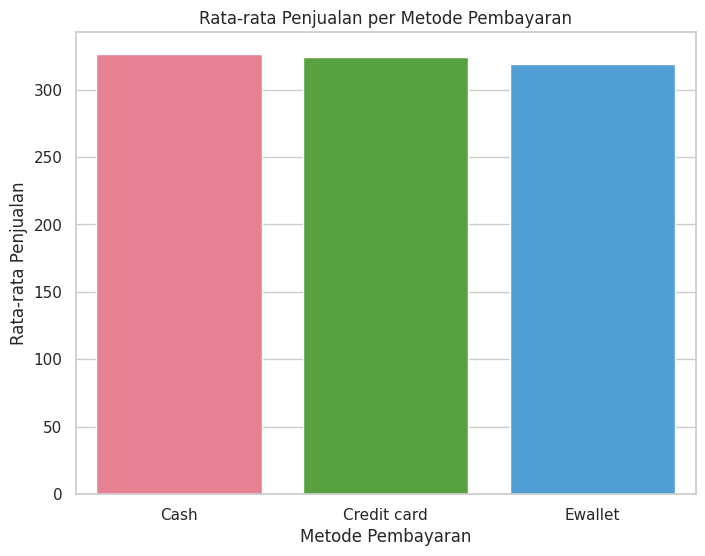

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung rata-rata penjualan berdasarkan metode pembayaran
payment_sales = df.groupby('Payment')['Total'].mean()

# Membuat daftar warna
colors = sns.color_palette("husl", len(payment_sales))

# Visualisasi Metode Pembayaran dengan warna berbeda untuk masing-masing metode
plt.figure(figsize=(8, 6))
sns.barplot(x=payment_sales.index, y=payment_sales.values, palette=colors)
plt.title('Rata-rata Penjualan per Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Rata-rata Penjualan')
plt.show()


#analisis waktu penjualan

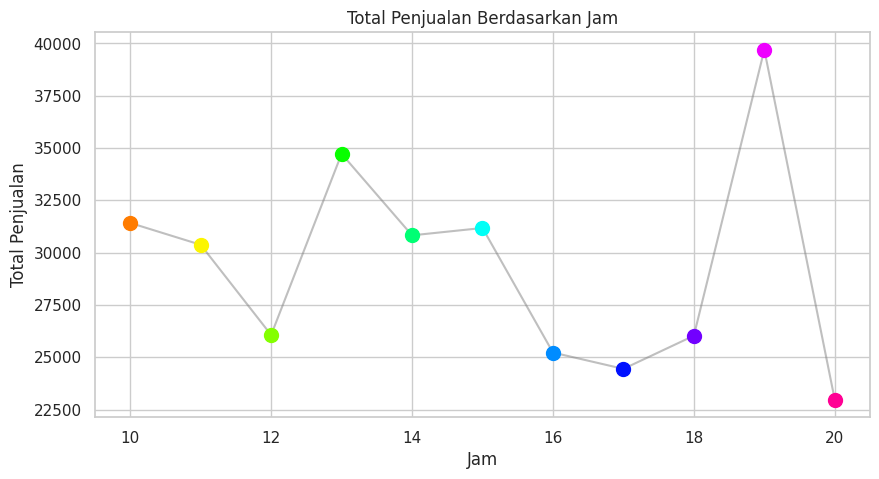

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Analisis Waktu Penjualan
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour #pd.to_datetime(df['Time'], format='%H:%M'): Fungsi pd.to_datetime dari Pandas digunakan untuk mengonversi kolom Time.format='%H:%M': Menentukan format waktu dalam string. '%H' adalah dua digit angka yang mewakili jam (00 hingga 23 untuk format 24 jam), dan '%M' adalah dua digit angka yang mewakili menit (00 hingga 59).Misalnya, jika kolom Time berisi nilai 12:30 akan menghasilkan objek datetime dengan jam 12 dan menit 30.
#.dt.hour Atribut .dt digunakan untuk mengakses komponen datetime dari kolom Pandas. hour mengekstrak komponen jam dari setiap nilai datetime.Misalnya, jika objek datetime adalah 2023-07-22 12:30:00, .dt.hour akan menghasilkan nilai 12.sedangkan df['Hour'] berisi jam yang diekstrak dari kolom Time.
hourly_sales = df.groupby('Hour')['Total'].sum().reset_index()

# Menentukan warna untuk setiap titik
num_colors = len(hourly_sales) #len(hourly_sales): Menghitung jumlah jam yang unik dalam hourly_sales.
colors = sns.color_palette("hsv", num_colors)

# Visualisasi Waktu Penjualan dengan warna yang berbeda untuk setiap titik
plt.figure(figsize=(10, 5))
for i, (hour, total) in enumerate(zip(hourly_sales['Hour'], hourly_sales['Total'])): #Mengiterasi setiap jam dan total penjualan dari hourly_sales.
    plt.scatter(hour, total, color=colors[i], s=100, zorder=5) #) sebagai sumbu y, dan menggunakan warna yang berbeda (colors[i]) untuk setiap titik. s=100 mengatur ukuran titik, dan zorder=5 memastikan titik berada di atas plot garis.
plt.plot(hourly_sales['Hour'], hourly_sales['Total'], color='gray', alpha=0.5, zorder=4)  # Menambahkan garis abu-abu transparan

plt.title('Total Penjualan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan')
plt.show()


##Analisis Tren Penjualan Berdasarkan Waktu

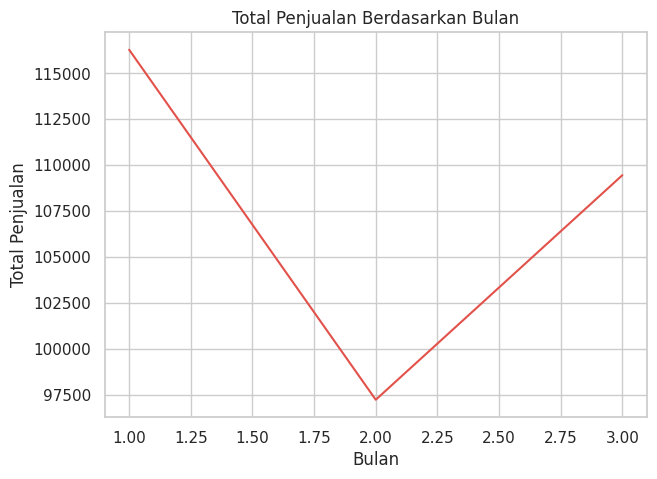

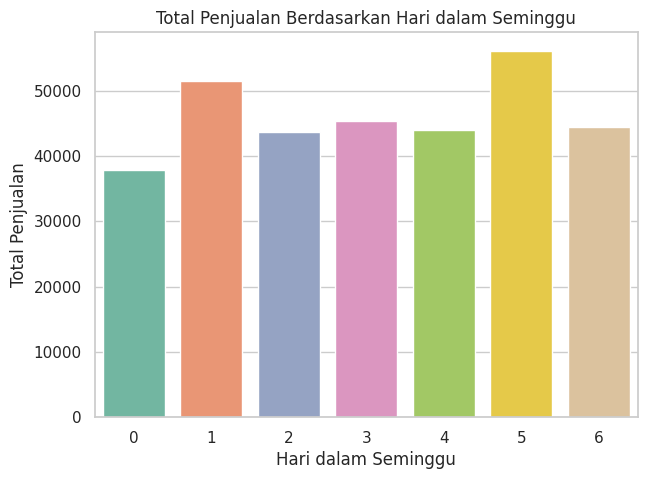

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengubah kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menambahkan kolom bulan dan hari dalam seminggu
df['Month'] = df['Date'].dt.month # Mengambil komponen bulan dari kolom Date dan menyimpannya di kolom baru Month.
df['Day of Week'] = df['Date'].dt.dayofweek #Mengambil komponen hari dalam seminggu dari kolom Date dan menyimpannya di kolom baru Day of Week. Hari dalam seminggu diindeks dari 0 (Senin) hingga 6 (Minggu).

# Tren penjualan bulanan
monthly_sales = df.groupby('Month')['Total'].sum() #Mengelompokkan data berdasarkan kolom Month dan menghitung total penjualan (Total) untuk setiap bulan.
plt.figure(figsize=(7, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Total Penjualan Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.show()

# Tren penjualan harian
daily_sales = df.groupby('Day of Week')['Total'].sum() #Mengelompokkan data berdasarkan kolom Day of Week dan menghitung total penjualan (Total) untuk setiap hari dalam seminggu.
plt.figure(figsize=(7, 5))
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='Set2')
plt.title('Total Penjualan Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Total Penjualan')
plt.show()


##Analisis kepuasan pelanggan

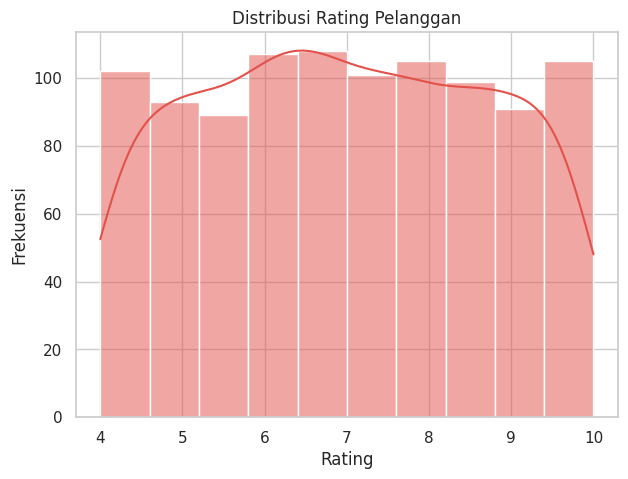

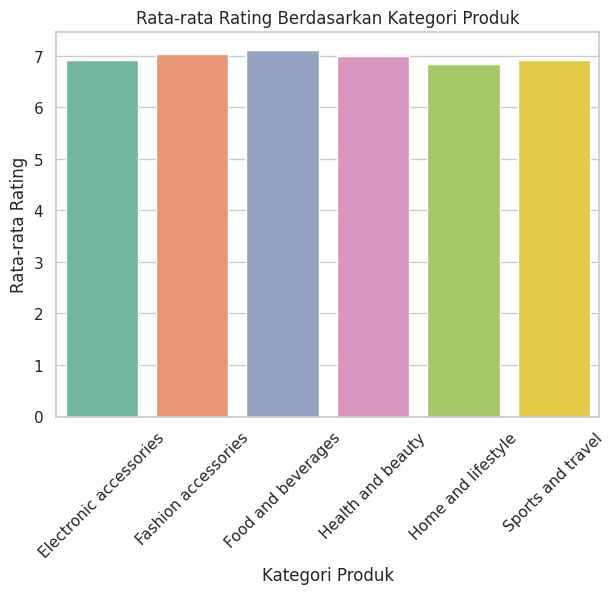

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi rating pelanggan
plt.figure(figsize=(7, 5))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribusi Rating Pelanggan')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

# Rata-rata rating per kategori produk
product_rating = df.groupby('Product line')['Rating'].mean()
plt.figure(figsize=(7, 5))
sns.barplot(x=product_rating.index, y=product_rating.values, palette='Set2')
plt.title('Rata-rata Rating Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Rata-rata Rating')
plt.xticks(rotation=45)
plt.show()


#Modelling data


## Pra-pemrosesan Data

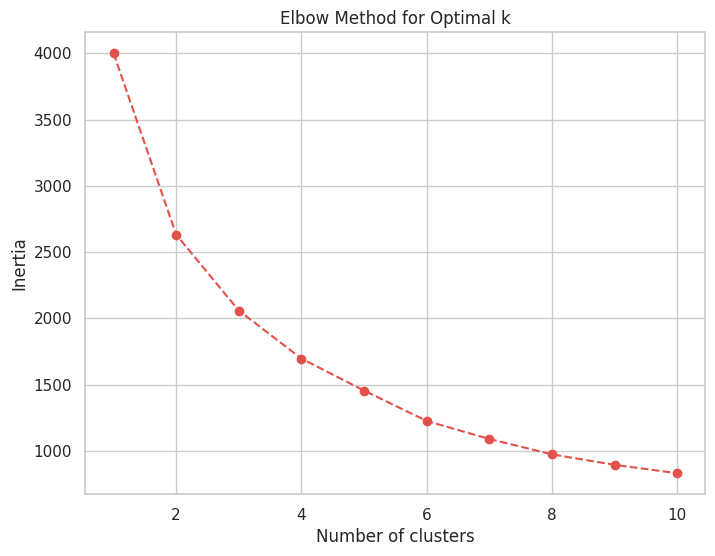

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Memilih kolom yang relevan untuk analisis
features = df[['Unit price', 'Quantity', 'Total', 'Rating']]

# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features) # memastikan bahwa semua fitur memiliki rata-rata 0 dan deviasi standar 1.

# Menghitung inertia untuk berbagai nilai k
inertias = []
for k in range(1, 11): #Mengevaluasi model K-Means untuk nilai k dari 1 hingga 10 (jumlah klaster yang berbeda) dan menyimpan inertia untuk setiap nilai k.
    kmeans = KMeans(n_clusters=k, random_state=42) # Membuat model K-Means dengan k klaster.
    kmeans.fit(scaled_features) # Menghitung klaster untuk data yang telah terstandarisasi.
    inertias.append(kmeans.inertia_) #Menyimpan nilai inertia dari model K-Means.

# Plotting elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--') #Membuat plot garis dengan titik-titik untuk nilai inertia yang dihitung. marker='o' menandai setiap titik dengan lingkaran, dan linestyle='--' membuat garis putus-putus.
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


##Penerapan K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

# menerapkan k-means clustering dengan membagi data menjadi 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42) #Membuat model K-Means dengan 3 klaster. random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan.
kmeans.fit(scaled_features) # Menerapkan algoritma K-Means pada data yang telah distandarisasi (scaled_features).

#  mengambil label klaster dari kmeans.labels_ dan menambahkannya sebagai kolom baru bernama 'Cluster'
df['Cluster'] = kmeans.labels_ #kmeans.labels_: Menyimpan label klaster untuk setiap data point.df['Cluster']: Menambahkan kolom baru bernama Cluster ke DataFrame df, yang berisi label klaster yang ditetapkan oleh model K-Means.

# mencetak lima baris pertama dari DataFrame yang telah di cluster sebanyak 3 cluster
print(df.head()) #Menampilkan lima baris pertama dari DataFrame df, yang sekarang termasuk kolom Cluster.

#Setiap baris dalam DataFrame sekarang memiliki label klaster di kolom Cluster. Misalnya, baris pertama termasuk dalam klaster 1, baris kedua dalam klaster 2, dan seterusnya.


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  1

##visualisasi clustering

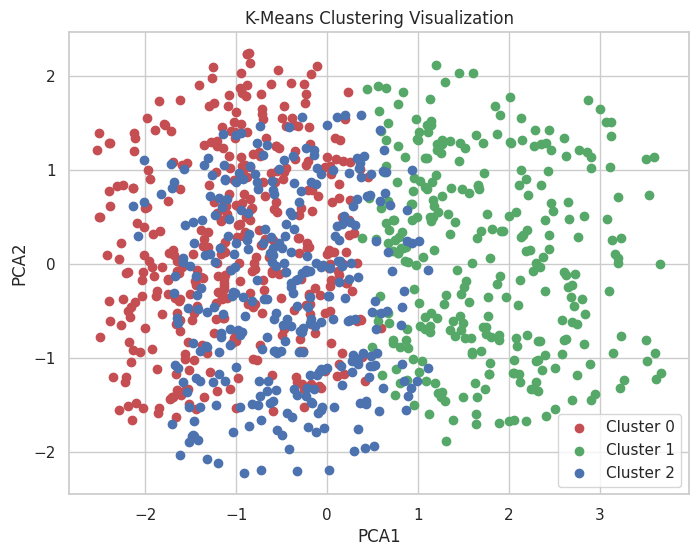

In [ ]:
#PCA (Principal Component Analysis): Teknik ini digunakan untuk mereduksi dimensi data sambil mempertahankan sebanyak mungkin variansi dalam data. Dengan kata lain, PCA mengubah data menjadi ruang dimensi yang lebih rendah (2D dalam kasus ini) yang masih menggambarkan karakteristik penting dari data.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensions to 2D using PCA
pca = PCA(n_components=2) #Membuat objek PCA untuk mereduksi dimensi data menjadi 2 komponen utama.
pca_components = pca.fit_transform(scaled_features) #Menghitung dan menerapkan transformasi PCA pada data fitur yang telah distandarisasi (scaled_features). Hasilnya adalah data yang direduksi menjadi dua dimensi, disimpan dalam pca_components.

# Add PCA components to the dataframe (Komponen utama dari PCA (PCA1 dan PCA2) ditambahkan ke DataFrame df sebagai kolom baru.  memungkinkan untuk memplot data dalam dimensi 2D.)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b'] # Menetapkan warna untuk setiap klaster (merah, hijau, biru) untuk membedakan klaster yang berbeda dalam plot.
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster] #Mengambil data untuk klaster tertentu.
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], c=colors[cluster], label=f'Cluster {cluster}') #Membuat scatter plot untuk data dari klaster tertentu dengan warna yang ditetapkan dan label untuk legenda.

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering Visualization')
plt.legend() #Menampilkan legenda untuk membedakan klaster.
plt.show()


##analisis Karakteristik Setiap cluster

In [ ]:
# menghitung jumlah anggota dan menyimpan nya dalam cluster_counts
cluster_counts = df['Cluster'].value_counts()

# Mengelompokkan data berdasarkan Cluster dan kemudian menghitung rata-rata dan deviasi standar untuk kolom-kolom yang disebutkan. Hasilnya disimpan dalam cluster_stats.
cluster_stats = df.groupby('Cluster').agg({ #.agg menghitung agregat (dalam hal ini, rata-rata (mean) dan deviasi standar (std)) untuk kolom 'Unit price', 'Quantity', 'Total', dan 'Rating'.
    'Unit price': ['mean', 'std'],
    'Quantity': ['mean', 'std'],
    'Total': ['mean', 'std'],
    'Rating': ['mean', 'std']
}).reset_index()

#menampilkan anggota dalam setiap cluster
print(cluster_counts)
#Menampilkan statistik rata-rata dan deviasi standar untuk setiap fitur dalam setiap cluster.
print(cluster_stats)


Cluster
0    381
2    320
1    299
Name: count, dtype: int64
  Cluster Unit price             Quantity                 Total              \
                mean        std      mean       std        mean         std   
0       0  57.665302  23.926375  2.467192  1.238462  152.165614   99.147288   
1       1  79.635652  14.006307  7.775920  1.796703  641.440119  166.010701   
2       2  30.908094  13.226590  7.015625  1.943498  228.753295  114.325898   

     Rating            
       mean       std  
0  6.934383  1.678188  
1  6.860535  1.774176  
2  7.123125  1.708167  


###Kesimpulan clustering
Klaster 0:

Harga Unit: Rata-rata 57.67 dengan standar deviasi 23.93.

Jumlah: Rata-rata 2.47 dengan standar deviasi 1.24.

Total: Rata-rata 152.17 dengan standar deviasi 99.15.

Rating: Rata-rata 6.93 dengan standar deviasi 1.68.

Karakteristik: Pelanggan dalam klaster ini cenderung membeli produk dengan harga unit sedang dan jumlah yang lebih sedikit. Nilai total pembelian juga relatif lebih rendah dibandingkan klaster lain.

Strategi: Fokus pada strategi penjualan produk-produk dengan harga unit sedang. Mungkin perlu meningkatkan volume pembelian pelanggan dengan menawarkan diskon untuk pembelian dalam jumlah yang lebih besar.

Klaster 1:

Harga Unit: Rata-rata 79.64 dengan standar deviasi 14.01.

Jumlah: Rata-rata 7.78 dengan standar deviasi 1.80.

Total: Rata-rata 641.44 dengan standar deviasi 166.01.

Rating: Rata-rata 6.86 dengan standar deviasi 1.77.

Karakteristik: Pelanggan dalam klaster ini cenderung membeli produk dengan harga unit tinggi dan jumlah yang besar. Nilai total pembelian juga paling tinggi di antara semua klaster.

Strategi: Pelanggan premium yang membeli dalam jumlah besar. Fokus pada program loyalitas dan penawaran eksklusif untuk mempertahankan pelanggan ini dan meningkatkan kepuasan mereka.


Klaster 2:

Harga Unit: Rata-rata 30.91 dengan standar deviasi 13.23.

Jumlah: Rata-rata 7.02 dengan standar deviasi 1.94.

Total: Rata-rata 228.75 dengan standar deviasi 114.33.

Rating: Rata-rata 7.12 dengan standar deviasi 1.71.

Karakteristik: Pelanggan dalam klaster ini cenderung membeli produk dengan harga unit rendah dan jumlah yang besar. Nilai total pembelian menengah dibandingkan klaster lain.

Strategi: Pembeli yang sensitif terhadap harga, tapi membeli dalam jumlah besar. Strategi promosi harga dan paket bundling produk bisa efektif untuk meningkatkan penjualan dalam klaster ini.